# Titanic Dataset Probleum
##### Objective : To predict the Survived or not based on other featured

## Data Collection and importing modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##  Data Pre-processing

In [3]:
df = df.drop('Name',axis=1)
df = df.drop('Ticket',axis=1)

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [4]:
df.shape

(891, 10)

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df = df.drop('Cabin',axis=1)
df = df.drop('Embarked',axis=1)

<Axes: xlabel='Age', ylabel='Count'>

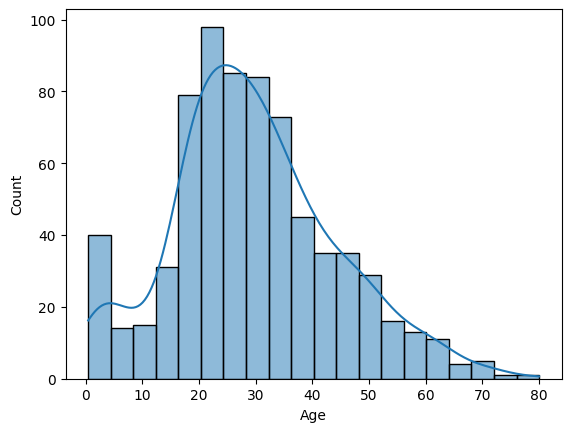

In [7]:
sns.histplot(df['Age'],kde=True)

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [9]:
df = df.drop_duplicates()
df.shape

(891, 8)

In [10]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [12]:
df = df.dropna()

In [13]:
df['Age'] = pd.to_numeric(df['Age'],errors="coerce")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Sex          714 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        714 non-null    int64  
 6   Parch        714 non-null    int64  
 7   Fare         714 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 50.2+ KB


In [15]:
label = LabelEncoder()

df['Sex'] = label.fit_transform(df['Sex'])
# 0 = female, 1 = male

In [16]:
scalar = StandardScaler()

df['Age'] = scalar.fit_transform(df[['Age']])
df['Fare'] = scalar.fit_transform(df[['Fare']])

## EDA

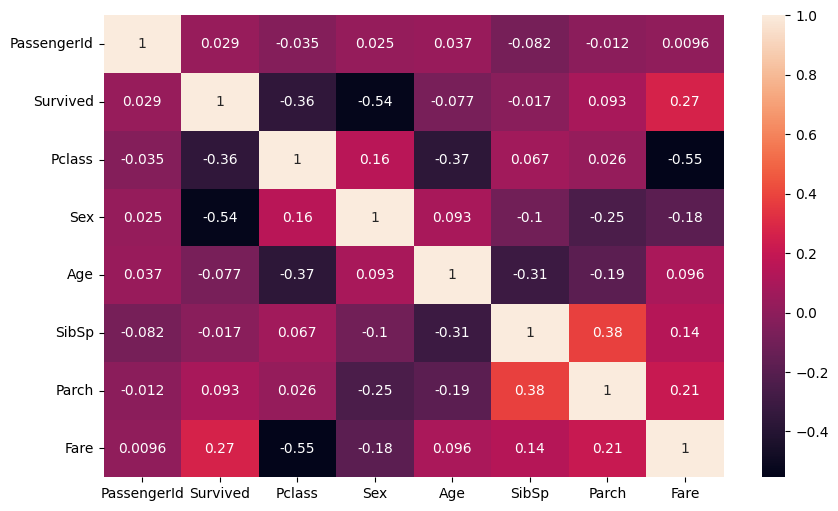

In [17]:
plt.figure(figsize=(10, 6))  
sns.heatmap(df.corr(), annot=True)
plt.show()

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,7.140000e+02,714.000000,714.000000,7.140000e+02
mean,448.582633,0.406162,2.236695,0.634454,2.338621e-16,0.512605,0.431373,-5.970947e-17
std,259.119524,0.491460,0.838250,0.481921,1.000701e+00,0.929783,0.853289,1.000701e+00
min,1.000000,0.000000,1.000000,0.000000,-2.016979e+00,0.000000,0.000000,-6.560759e-01
25%,222.250000,0.000000,1.000000,0.000000,-6.595416e-01,0.000000,0.000000,-5.038498e-01
50%,445.000000,0.000000,2.000000,1.000000,-1.170488e-01,0.000000,0.000000,-3.583992e-01
75%,677.750000,1.000000,3.000000,1.000000,5.718310e-01,1.000000,1.000000,-2.495211e-02
max,891.000000,1.000000,3.000000,1.000000,3.465126e+00,5.000000,6.000000,9.032109e+00


## Model Implementation

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [22]:
# Correcting train-test split
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [29]:
y_pred = logistic.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        87
           1       0.69      0.68      0.68        56

    accuracy                           0.76       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.75      0.76      0.75       143



## Hyper Parameter Testing because got 76% Accuracy

In [36]:
param_grid = {
    'max_iter': [100, 200, 500],  
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  
    'solver': ['liblinear', 'lbfgs', 'saga'], 
}

In [37]:
from sklearn.model_selection import GridSearchCV

logistic_v2 = GridSearchCV(logistic,param_grid,n_jobs=-1,cv=3)

In [42]:
logistic_v2.fit(X_train,y_train)

/Users/akash/code/DataScience Bootcamp/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/akash/code/DataScience Bootcamp/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/akash/code/DataScience Bootcamp/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/akash/code/DataScience Bootcamp/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/akash/code/DataScience Bootcamp/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the 

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'lbfgs', 'saga']})

In [40]:
y_pred = logistic_v2.predict(X_test)

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        87
           1       0.69      0.68      0.68        56

    accuracy                           0.76       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.75      0.76      0.75       143



## Switching to Decission tree for higher Accuracy

In [43]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred = DT.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76        87
           1       0.63      0.66      0.64        56

    accuracy                           0.71       143
   macro avg       0.70      0.70      0.70       143
weighted avg       0.72      0.71      0.71       143



## Switching to Random Forest model for better Accuracy 

In [45]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
y_pred = RFC.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        87
           1       0.73      0.73      0.73        56

    accuracy                           0.79       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



## Hyper parameter tuning on Random forest

In [48]:
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [3, 5, 10, None],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 5],  
}

In [49]:
RFC_v2 = GridSearchCV(RFC,param_grid,n_jobs=-1)

In [51]:
RFC_v2.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [52]:
y_pred = RFC_v2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        87
           1       0.78      0.71      0.75        56

    accuracy                           0.81       143
   macro avg       0.81      0.79      0.80       143
weighted avg       0.81      0.81      0.81       143



In [53]:
RFC_v2.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50)

## Making kaggle submission with 81% Accuracy !!

In [56]:
test = pd.read_csv('test.csv')

In [59]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,892,3,male,34.5,0,0,7.8292,NaN
1,893,3,female,47.0,1,0,7.0000,NaN
2,894,2,male,62.0,0,0,9.6875,NaN
3,895,3,male,27.0,0,0,8.6625,NaN
4,896,3,female,22.0,1,1,12.2875,NaN


In [ ]:
test = test.drop(["Cabin", "Embarked", "Name", "Ticket"], axis=1)

In [64]:
label = LabelEncoder()

test['Sex'] = label.fit_transform(test['Sex'])
# 0 = female, 1 = male

scalar = StandardScaler()

test['Age'] = scalar.fit_transform(test[['Age']])
test['Fare'] = scalar.fit_transform(test[['Fare']])

In [72]:
test = test.drop('Cabin',axis=1)

In [73]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,0.298549,0,0,-0.497811
1,893,3,0,1.181328,1,0,-0.512660
2,894,2,1,2.240662,0,0,-0.464532
3,895,3,1,-0.231118,0,0,-0.482888
4,896,3,0,-0.584229,1,1,-0.417971


In [ ]:
print("Train features:", X_train.columns.tolist()) 
print("Test features:", test.columns.tolist())  

Train features: ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
Test features: ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


In [75]:
submition_pred = RFC_v2.predict(test)

In [76]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": submition_pred
})

submission.to_csv("submission.csv", index=False)